Analisis de goleadores en la eurocopa 2016 .


In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
import numpy as numpy
warnings.filterwarnings("ignore")

In [7]:
eurodf = pd.read_csv("euro2016goals.csv")

In [8]:
eurodf.head(5)

,FULL_NAME,AGE,LEAGUE,SEASON,POSITION,CURRENT_CLUB,MINUTES_PLAYED_OVERALL,MINUTES_PLAYED_HOME,MINUTES_PLAYED_AWAY,NATIONALITY,...,GOALS_PER_90_OVERALL,GOALS_PER_90_HOME,GOALS_PER_90_AWAY,MIN_PER_GOAL_OVERALL,CONCEDED_PER_90_OVERALL,MIN_PER_CONCEDED_OVERALL,MIN_PER_MATCH,MIN_PER_CARD_OVERALL,MIN_PER_ASSIST_OVERALL,CARDS_PER_90_OVERALL
0,Aaron Ramsey,30,UEFA Euro Championship,2016,Midfielder,Wales,448,268,180,Wales,...,0.20,0.00,0.50,448,0.60,149,90,224,112,0.40
1,Adam Szalai,33,UEFA Euro Championship,2016,Forward,Hungary,235,161,74,Hungary,...,0.38,0.00,1.22,235,2.30,39,59,235,0,0.38
2,Admir Mehmedi,30,UEFA Euro Championship,2016,Forward,Switzerland,308,156,152,Switzerland,...,0.29,0.00,0.59,308,0.58,154,77,0,0,0.00
3,Alessandro Schoepf,27,UEFA Euro Championship,2016,Midfielder,Austria,81,12,69,Austria,...,1.11,0.00,1.30,81,1.11,81,27,81,0,1.11
4,Alvaro Morata,28,UEFA Euro Championship,2016,Forward,Spain,289,152,137,Spain,...,0.93,1.18,0.66,96,0.62,145,72,0,0,0.00


In [9]:
eurodf.columns

Index(['FULL_NAME', 'AGE', 'LEAGUE', 'SEASON', 'POSITION', 'CURRENT_CLUB',
       'MINUTES_PLAYED_OVERALL', 'MINUTES_PLAYED_HOME', 'MINUTES_PLAYED_AWAY',
       'NATIONALITY', 'APPEARANCES_OVERALL', 'APPEARANCES_HOME',
       'APPEARANCES_AWAY', 'GOALS_OVERALL', 'GOALS_HOME', 'GOALS_AWAY',
       'ASSISTS_OVERALL', 'ASSISTS_HOME', 'ASSISTS_AWAY', 'PENALTY_GOALS',
       'PENALTY_MISSES', 'CLEAN_SHEETS_OVERALL', 'CLEAN_SHEETS_HOME',
       'CLEAN_SHEETS_AWAY', 'CONCEDED_OVERALL', 'CONCEDED_HOME',
       'CONCEDED_AWAY', 'YELLOW_CARDS_OVERALL', 'RED_CARDS_OVERALL',
       'GOALS_INVOLVED_PER_90_OVERALL', 'ASSISTS_PER_90_OVERALL',
       'GOALS_PER_90_OVERALL', 'GOALS_PER_90_HOME', 'GOALS_PER_90_AWAY',
       'MIN_PER_GOAL_OVERALL', 'CONCEDED_PER_90_OVERALL',
       'MIN_PER_CONCEDED_OVERALL', 'MIN_PER_MATCH', 'MIN_PER_CARD_OVERALL',
       'MIN_PER_ASSIST_OVERALL', 'CARDS_PER_90_OVERALL'],
      dtype='object')

tabla de goleadores (nombre, nacionalidad, Gol average, asistencias average)

In [14]:
df_player = eurodf[["FULL_NAME", "NATIONALITY", "GOALS_OVERALL", "ASSISTS_OVERALL"]]

In [15]:
df_player.head()     

,FULL_NAME,NATIONALITY,GOALS_OVERALL,ASSISTS_OVERALL
0,Aaron Ramsey,Wales,1,4
1,Adam Szalai,Hungary,1,0
2,Admir Mehmedi,Switzerland,1,0
3,Alessandro Schoepf,Austria,1,0
4,Alvaro Morata,Spain,3,0


In [19]:
df_player[df_player["GOALS_OVERALL"]>2]

,FULL_NAME,NATIONALITY,GOALS_OVERALL,ASSISTS_OVERALL
4,Alvaro Morata,Spain,3,0
5,Antoine Griezmann,France,6,2
16,Cristiano Ronaldo,Portugal,3,2
19,Dimitri Payet,France,3,2
26,Gareth Bale,Wales,3,0
42,Luis Carlos Almeida da Cunha,Portugal,3,1
53,Olivier Giroud,France,3,2


In [44]:
df_player[df_player["ASSISTS_OVERALL"]>1]

,FULL_NAME,NATIONALITY,GOALS_OVERALL,ASSISTS_OVERALL
0,Aaron Ramsey,Wales,1,4
5,Antoine Griezmann,France,6,2
16,Cristiano Ronaldo,Portugal,3,2
19,Dimitri Payet,France,3,2
20,Eden Hazard,Belgium,1,4
53,Olivier Giroud,France,3,2


In [21]:
df_country = eurodf.groupby("NATIONALITY").agg({"GOALS_OVERALL":"sum","ASSISTS_OVERALL":"sum"})

In [55]:
df_country.head()

,GOALS_OVERALL,ASSISTS_OVERALL
NATIONALITY,,
Albania,1,0
Austria,1,0
Belgium,9,5
Croatia,5,2
Czech Republic,2,0


In [51]:
df_country[df_country["GOALS_OVERALL"]>5]

,GOALS_OVERALL,ASSISTS_OVERALL
NATIONALITY,,
Belgium,9,5
France,13,6
Germany,7,2
Iceland,8,2
Italy,6,2
Portugal,9,4
Wales,9,4


In [41]:
df_country["GOALS_OVERALL"].describe()

count    22.000000
mean      4.772727
std       3.206122
min       1.000000
25%       2.000000
50%       4.000000
75%       6.750000
max      13.000000
Name: GOALS_OVERALL, dtype: float64

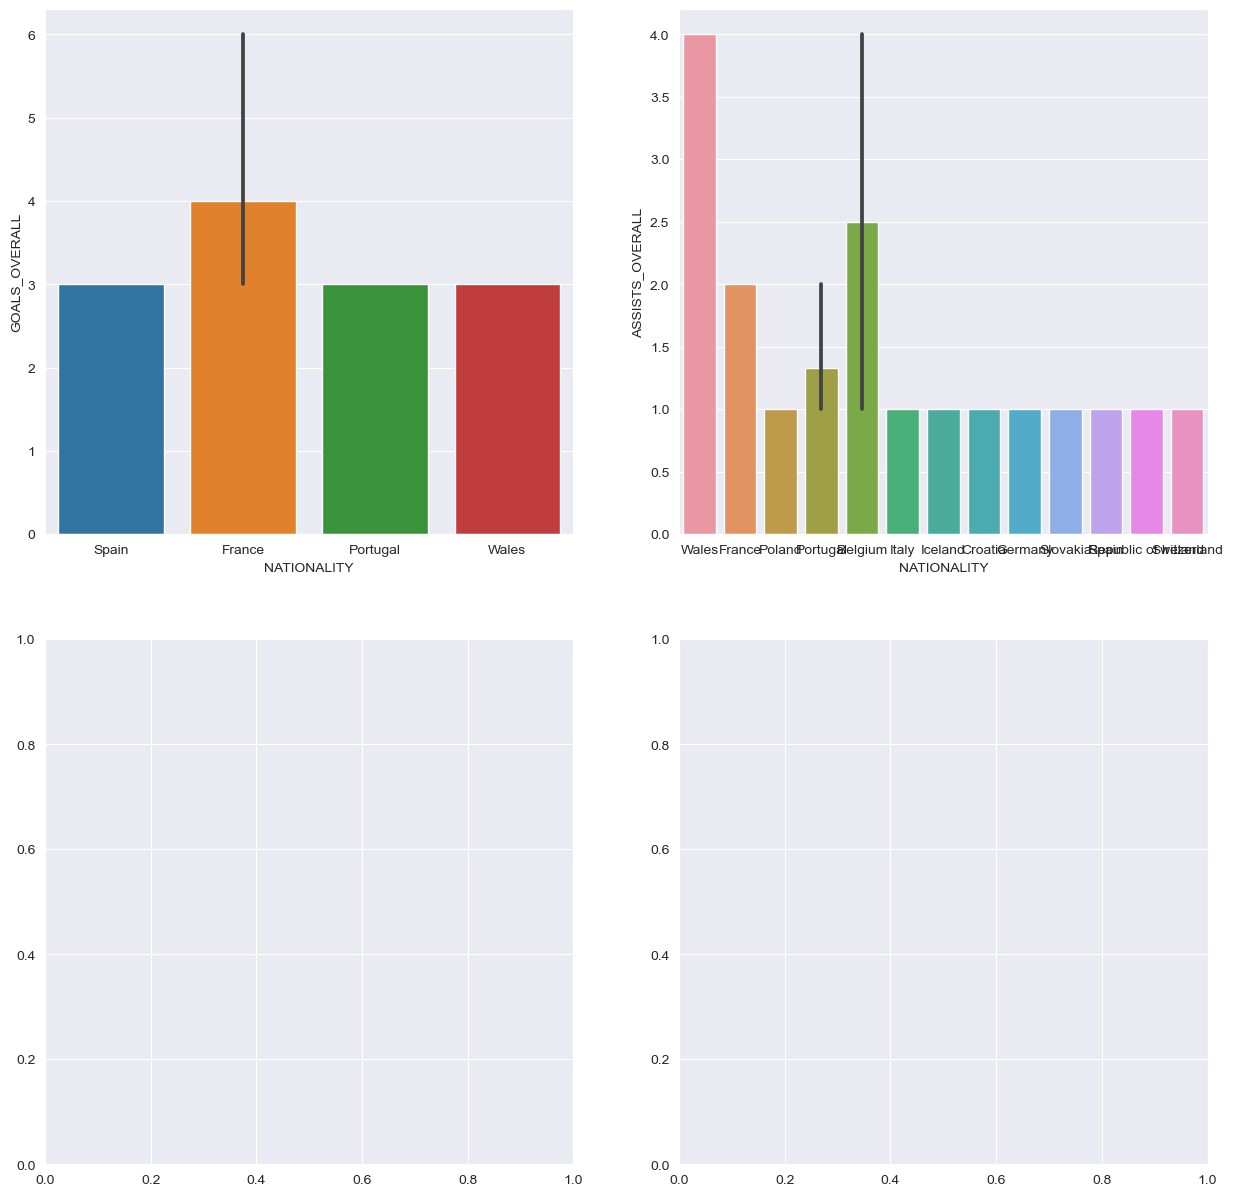

In [102]:
f, axes = plt.subplots(2,2,figsize = (15,15))
sns.set_style("darkgrid")

fig2= sns.barplot(x="NATIONALITY", y ="ASSISTS_OVERALL", data = df_player[df_player["ASSISTS_OVERALL"]>0], ax = axes[0,1])
fig1= sns.barplot(x="NATIONALITY", y ="GOALS_OVERALL", data = df_player[df_player["GOALS_OVERALL"]>2], ax = axes[0,0])



